In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

## Word2Vec (CBOW) in Perfume Data

### Data Load & Preprocessing

In [5]:
# 향수 데이터 불러오기
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/sample_data.csv')
dataset

,Unnamed: 0,name,review
0,0,CK One Calvin Klein (unisex) ~ 1994,This has been my staple since 1994 when I was...
1,1,Tobacco Vanille Tom Ford (unisex) ~ 2007,C90 (2020 batch)\nAfter years of purchasing d...
2,2,Un Jardin Sur Le Nil Hermès (unisex) ~ 2005,"Really liked this today, fresh, hint of spice..."
3,3,Chergui Serge Lutens (unisex) ~ 2005,"Incredible, amazing, a total must have ! I ge..."
4,4,Mugler Cologne Mugler (unisex) ~ 2001,"fresh out of the shower, citrus and a white f..."
5,5,Black Bvlgari (unisex) ~ 1998,I'd been meaning to try this perfume for year...
6,6,02 L'Air du Desert Marocain Tauer Perfumes (un...,When I first started this somehow addiction a...
7,7,Philosykos Diptyque (unisex) ~ 1996,Fig trees coastal orchard somewhere in southe...
8,8,Coromandel Eau de Parfum Chanel (unisex) ~ 2016,My bottle of Jessica Simpson Fancy Nights wen...
9,9,4711 Original Eau de Cologne 4711 (unisex),"Smells very decadent, makes you want to walk ..."


In [6]:
# 전체 리뷰 합친 corpus생성
corpus = ''
for i in range(len(dataset)):
    corpus = ' '.join([corpus, dataset.loc[i,"review"]])

In [7]:
# NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(corpus)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
normalized_text

[' this has been my staple since 1994 when i was in high school still love this today ',
 'the green tea base note is amazing ',
 ' u already know ',
 'first impression enjoyed the depth that the herbal and woody undertones added to the synthetic citrus body ',
 'however the more i returned to the scent the more like a cleaning product it smelled to me ',
 'lemon windex ',
 'nonetheless it layers very nicely with the organic sweetness of d g s light blue which tempers the synthetic lemon and creates a light but fairly complex citrus scent ',
 'totally unisex and timeless a clean bright scent that would be appropriate for most occasions ',
 'you can t go wrong with it but you certainly won t stand out either ',
 'looooove it reminds me of my high school days ',
 'sadly doesn t last at all i used to literally douse myself in this but it was gone in an hour lol ',
 'super fresh clean and juicy ',
 'urban normcore y2k techno utopian soapy modern not aldehydic vibe ',
 'the smart casual of 

In [10]:
# NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(corpus)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 불용어 리스트 불러오기
stop_words = []
f = open("/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/stopword_sample.txt", "r")
lines = f.readlines()
for line in lines:
    line = line.strip()
    if(len(line)!=1):
        stop_words.append(line)
f.close()


# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

# # 향수 샘플 불용어 제거
# result2 = []
# for review in result:
#     reviews=[]
#     for word in review:
#         words=''
#         if word not in stop_words:
#             words=''.join([words,word])
#             reviews.append(words)
#     result2.append(reviews)
# result = result2

In [11]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 13161


In [12]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['this', 'has', 'been', 'my', 'staple', 'since', '1994', 'when', 'i', 'was', 'in', 'high', 'school', 'still', 'love', 'this', 'today']
['the', 'green', 'tea', 'base', 'note', 'is', 'amazing']
['u', 'already', 'know']


### Train Word2Vec
* size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
* window = 컨텍스트 윈도우 크기
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
* workers = 학습을 위한 프로세스 수
* sg = 0은 CBOW, 1은 Skip-gram.

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [14]:
# 입력한 단어에 대해서 가장 유사한 단어들을 출력
model_result = model.wv.most_similar("citrus")
print(model_result)

[('floral', 0.9968902468681335), ('amber', 0.9930134415626526), ('spicy', 0.9876487255096436), ('woody', 0.9862553477287292), ('white', 0.9824383854866028), ('powdery', 0.9801296591758728), ('hint', 0.9781766533851624), ('sweet', 0.9781100749969482), ('vanilla', 0.976426362991333), ('green', 0.975860595703125)]


### Model Save & Load

In [17]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/perfume_sample_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/perfume_sample_w2v") # 모델 로드

In [16]:
model_result = loaded_model.most_similar("patchouli")
print(model_result)

[('spices', 0.9992787837982178), ('chocolate', 0.9990713596343994), ('tea', 0.998418390750885), ('touch', 0.9983378648757935), ('incense', 0.9981109499931335), ('background', 0.9972049593925476), ('fruity', 0.9969754219055176), ('cocoa', 0.9969230890274048), ('florals', 0.9960823059082031), ('earthy', 0.996021032333374)]


### Embedding Visualization
* https://projector.tensorflow.org/

In [18]:
!python -m gensim.scripts.word2vec2tensor --input perfume_sample_w2v --output perfume_sample_w2v

2021-05-11 11:27:55,710 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input perfume_sample_w2v --output perfume_sample_w2v
2021-05-11 11:27:55,711 - utils_any2vec - INFO - loading projection weights from perfume_sample_w2v
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py", line 94, in <module>
    word2vec2tensor(args.input, args.output, args.binary)
  File "/usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py", line 68, in word2vec2tensor
    model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=binary)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py", line 1438, in load_word2vec_format
    limit=

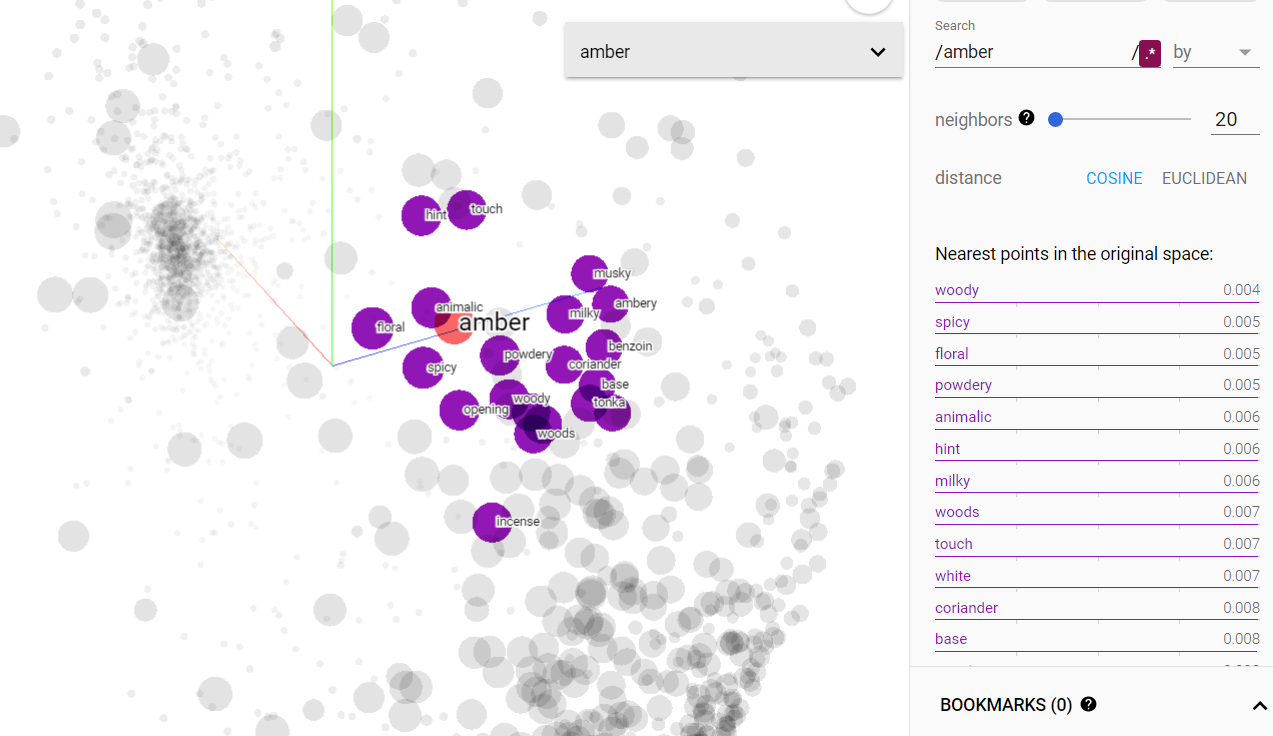

## Word2Vec(Skip-Gram in Negative Sampling) in Perfume Data

두 단어를 입력으로 넣어서 한 윈도우에 등장했던 적이 있다면 1, 아니라면 0을 예측하도록 학습

### Organizing datasets with negative sampling

In [19]:
# 향수 데이터 불러오기
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/sample_data.csv')

documents = dataset.review

# 전처리
perfume_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
perfume_df['clean_doc'] = perfume_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
perfume_df['clean_doc'] = perfume_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
perfume_df['clean_doc'] = perfume_df['clean_doc'].apply(lambda x: x.lower())

In [20]:
# Null값 확인
perfume_df.isnull().values.any()

False

In [21]:
# empty값 확인
perfume_df.replace("",float("Nan"), inplace=True)
perfume_df.isnull().values.any()

False

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
# NLTK로부터 불용어 로드
stop_words = stopwords.words('english') 
tokenized_doc = perfume_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) # 불용어 제거

print(tokenized_doc[:5])

0    [staple, since, high, school, still, love, tod...
1    [batch, years, purchasing, decants, finally, d...
2    [really, liked, today, fresh, hint, spice, nat...
3    [incredible, amazing, total, must, compliments...
4    [fresh, shower, citrus, white, flower, clean, ...
Name: clean_doc, dtype: object


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# 단어 집합 생성 및 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

print(encoded[:2])

[[625, 151, 152, 413, 28, 5, 167, 13, 205, 22, 141, 234, 44, 20, 433, 1006, 533, 483, 106, 2836, 830, 316, 31, 267, 116, 2079, 2, 1, 1380, 1130, 48, 334, 2837, 1294, 1381, 702, 1650, 129, 97, 799, 4984, 316, 334, 1190, 97, 753, 277, 31, 2, 284, 36, 800, 34, 311, 2, 14, 1191, 493, 444, 317, 754, 268, 3589, 88, 152, 413, 107, 755, 70, 98, 396, 2393, 269, 142, 235, 7, 34, 494, 1131, 3590, 4985, 4986, 124, 318, 2080, 159, 3591, 370, 608, 116, 327, 1, 108, 3592, 4987, 1132, 954, 568, 1065, 78, 955, 2838, 545, 84, 1, 10, 21, 12, 285, 7, 184, 2, 28, 8, 270, 27, 1, 19, 353, 319, 831, 1380, 397, 4988, 4989, 21, 235, 534, 3, 113, 3593, 34, 253, 19, 161, 36, 25, 38, 35, 15, 246, 342, 371, 4990, 457, 9, 609, 911, 2839, 553, 872, 626, 956, 1838, 48, 17, 34, 184, 173, 139, 24, 912, 8, 17, 185, 72, 139, 1651, 9, 151, 170, 28, 8, 372, 24, 139, 444, 101, 3594, 26, 1295, 1, 98, 19, 269, 627, 655, 414, 278, 3, 1499, 31, 37, 1652, 23, 91, 48, 31, 47, 21, 1380, 1133, 1296, 48, 328, 801, 279, 343, 1839, 42,

In [28]:
print(len(encoded))

10


In [26]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 9822


In [29]:
from tensorflow.keras.preprocessing.sequence import skipgrams

# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [30]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(dirty (484), solids (8475)) -> 0
(floral (77), floral (77)) -> 1
(notes (6), appeal (726)) -> 1
(little (43), want (46)) -> 1
(scent (2), remedied (8693)) -> 0


윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우는 0의 레이블을 가지도록 구성됨

In [31]:
# 첫번째 향수그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

280860
280860


### Implementing SGNS

In [32]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [33]:
# 사용자 정의 파라미터
# 임베딩 벡터 차원
embed_size = 100

In [34]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [35]:
# 각 단어는 임베딩 테이블을 거쳐서 내적을 수행
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)

# 내적의 결과는 1 또는 0을 예측하기 위해서 시그모이드 함수를 활성화 함수로
output = Activation('sigmoid')(dot_product)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       982200      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       982200      input_2[0][0]                    
____________________________________________________________________________________________

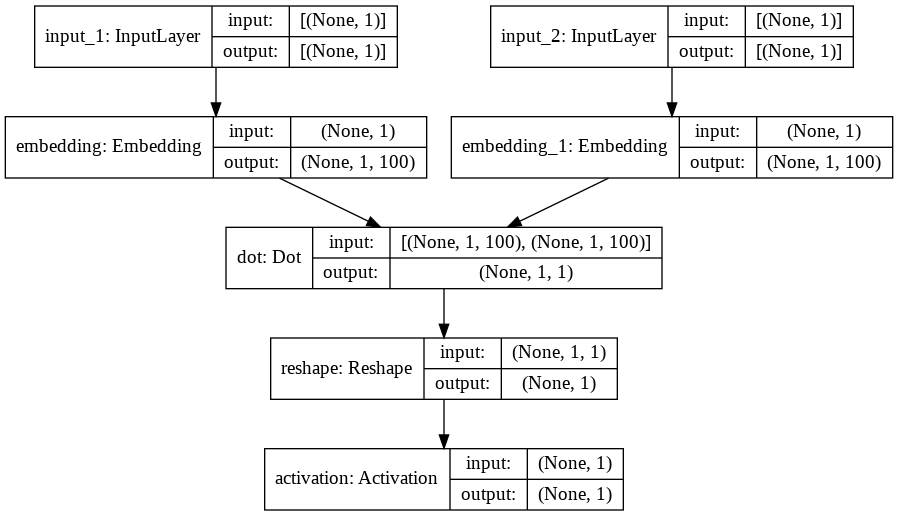

In [37]:
# 모델 생성
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/SGNS_model1.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [38]:
# 모델 학습
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 6.931131422519684
Epoch : 2 Loss : 6.928062438964844
Epoch : 3 Loss : 6.91952645778656
Epoch : 4 Loss : 6.897095143795013
Epoch : 5 Loss : 6.847486972808838


### Result

In [39]:
import gensim

# 학습된 임베딩 벡터들을 SGNS_vectors1.txt로 저장
f = open('/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/SGNS_vectors1.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [41]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/Colab Notebooks/deeplearning_NLP/perfume/SGNS_vectors1.txt', binary=False)

In [53]:
w2v.most_similar(positive=['woman'])

[('beautiful', 0.6582332849502563),
 ('opening', 0.6547549366950989),
 ('masculine', 0.6282303929328918),
 ('lasts', 0.626775324344635),
 ('little', 0.6259146928787231),
 ('smell', 0.6230643391609192),
 ('best', 0.6160377860069275),
 ('always', 0.6131337881088257),
 ('sweet', 0.6027578115463257),
 ('away', 0.6019416451454163)]